В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
unique_values = cars_df.nunique()
unique_values

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

In [5]:
cars_df.select_dtypes('object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [6]:
numerical_columns = cars_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = cars_df.select_dtypes(include=['object']).columns

print(f'Numerical columns: {len(numerical_columns)}')
print(f'Categorical columns: {len(categorical_columns)}')

Numerical columns: 8
Categorical columns: 5


In [7]:
for col in categorical_columns:
    unique_vals = cars_df[col].unique()
    print('Column:', col)
    print('Unique values:', unique_vals)
    print('=' * 40)

Column: Brand
Unique values: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Column: Model
Unique values: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Column: Fuel_Type
Unique values: ['Petrol' 'Diesel']
Column: Transmission
Unique values: ['Manual' 'Automatic']
Column: Owner_Type
Unique values: ['First' 'Second' 'Third']


**Висновок:**
У наборі даних 8 числових колонок та 5 категоріальних колонок, з них:
- 2 бінарні Fuel_Type, Transmission
- 2 мультикатегоріальні (більше 2 значень) - значення пов’язані
- 1 мультикатегоріальна колонка, в якій можна встановити відношення порядку Owner_Type з First, Second, Third
- 1 Car_ID, яка не несе інформації для аналізу

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [8]:
X = cars_df.drop(columns=['Price'], axis=1)
y = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(cars_df.drop(columns=['Price']), cars_df['Price'], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(fuel_type_codes)

In [10]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

In [11]:
ohe_columns = ['Brand']
ohenc = OneHotEncoder()
ohenc.fit(X_train[ohe_columns])

one_hot = ohenc.transform(X_train[ohe_columns]).toarray()
X_train[ohenc.categories_[0]] = one_hot

one_hot = ohenc.transform(X_test[ohe_columns]).toarray()
X_test[ohenc.categories_[0]] = one_hot

In [12]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [13]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [30]:
correlation = pd.concat([X_train.select_dtypes('number'), y_train], axis=1)
display(correlation)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,3,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
27,28,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


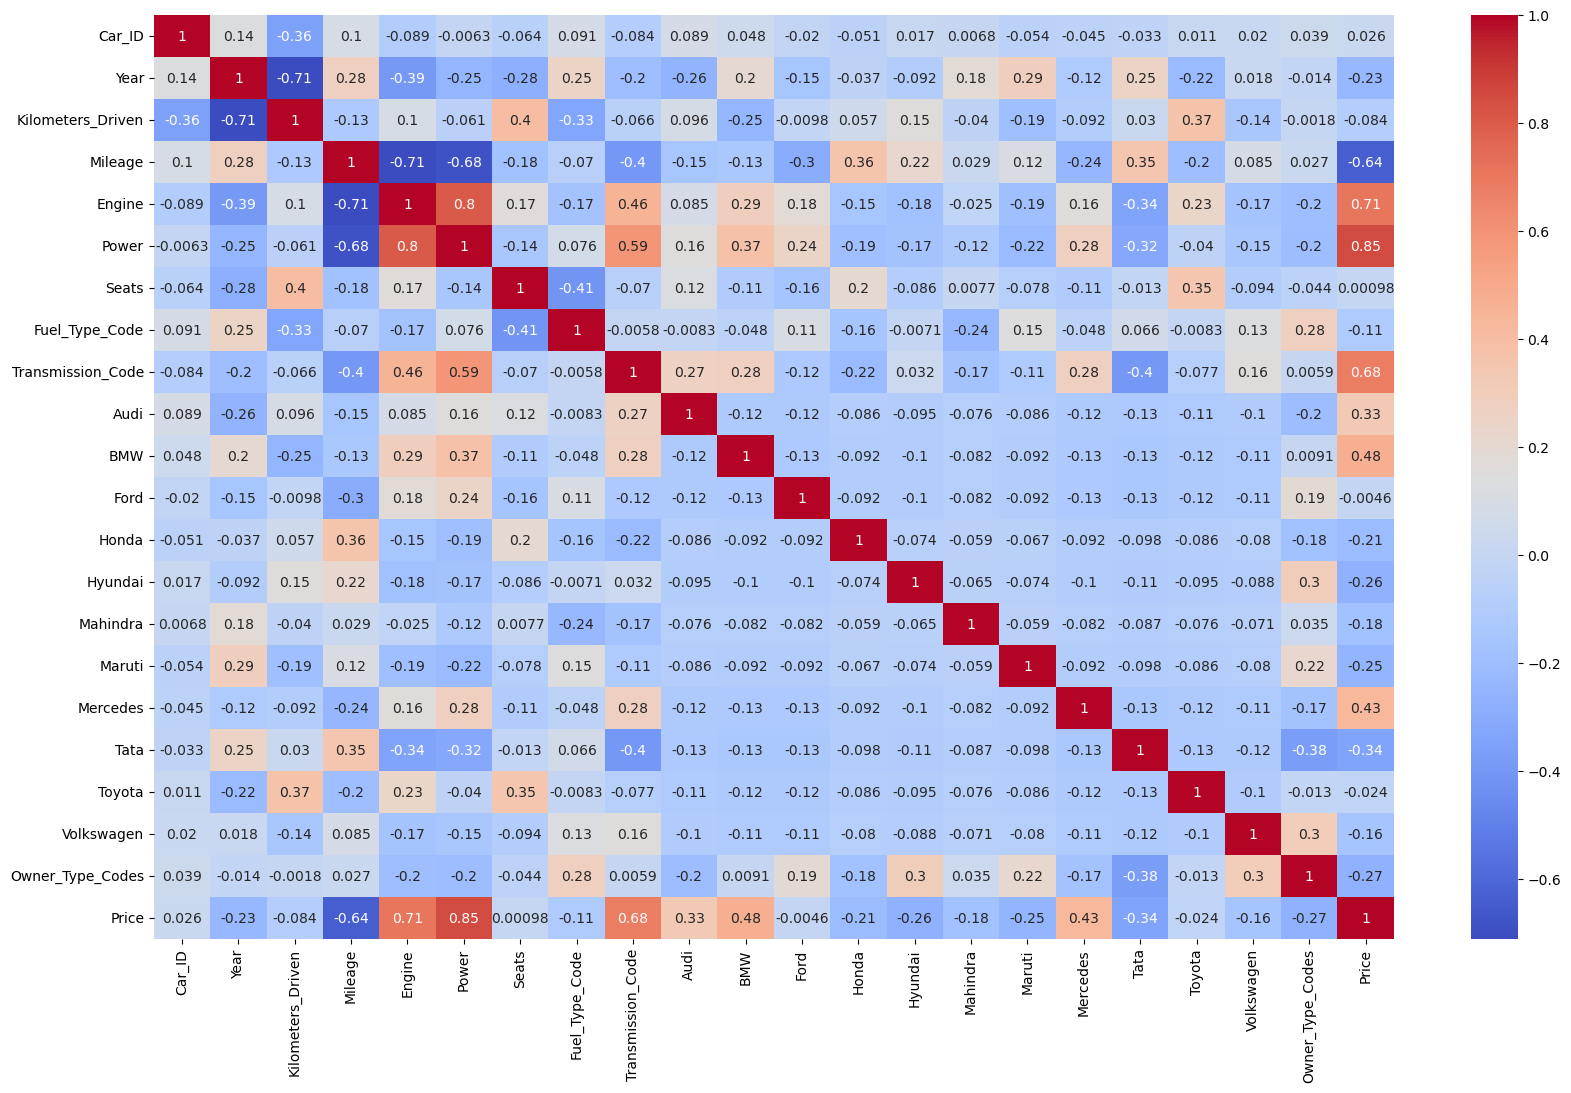

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation.corr(), annot=True ,cmap='coolwarm')
plt.show()

In [58]:
target_correlations = correlation.corr()['Price'].abs().sort_values(ascending=False)
high_correlation = target_correlations[target_correlations > 0.5].index

print("Correlation > 0.5:")
print(target_correlations[high_correlation])

Correlation > 0.5:
Price                1.000000
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage              0.638404
Name: Price, dtype: float64


Висновок: Найбільшу кореляцію > 0.5 із цільовою змінною Price:

Power: 0.85
Engine: 0.71
Transmission_Code:
Mileage: -0.64

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [47]:
X_train.drop(columns=X_train.select_dtypes('object').columns, inplace=True)
X_test.drop(columns=X_test.select_dtypes('object').columns, inplace=True)

display(X_train.head())
print(X_train.shape)
print(X_test.shape)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


(80, 21)
(20, 21)


In [48]:
model = LinearRegression().fit(X_train, y_train)

In [49]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE traint: {rmse_train:.2f}')
print(f'RMSE test: {rmse_test:.2f}')

RMSE traint: 210293.58
RMSE test: 258181.56


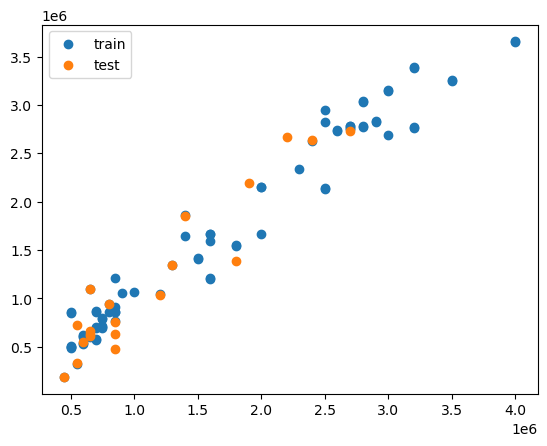

In [50]:
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.legend();

In [51]:
cars_df.Price.describe().round(2)

count        100.00
mean     1574000.00
std      1000264.61
min       450000.00
25%       700000.00
50%      1300000.00
75%      2500000.00
max      4000000.00
Name: Price, dtype: float64

**Висновок:** Модель працює добре на тренувальних даних, але її тестові дані не дуже.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [52]:
display(X_train.head()), display(X_test.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [53]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train_scaled.describe().round(2)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.85,-2.11,-2.00,-2.07,-1.32,-1.21,-1.65,-1.03,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.99
25%,-0.79,-0.32,-0.69,-0.60,-0.64,-0.78,-0.30,-1.03,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.99
50%,0.01,-0.32,-0.04,-0.02,0.06,-0.16,-0.30,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,0.54
75%,0.85,0.57,0.48,0.57,0.42,0.30,-0.30,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,0.54
max,1.66,2.35,3.45,2.33,4.63,2.81,2.39,0.98,0.80,3.00,2.81,2.81,3.87,3.51,4.36,3.87,2.81,2.65,3.00,3.23,2.06


In [54]:
print("Shape X_train_scaled:", X_train_scaled.shape)
print("Shape X_test_scaled:", X_test_scaled.shape)

print("Mean scaled X_train:\n", X_train_scaled.mean(axis=0))
print("Std scaled X_train:\n", X_train_scaled.std(axis=0))

Shape X_train_scaled: (80, 21)
Shape X_test_scaled: (20, 21)
Mean scaled X_train:
 Car_ID              -4.440892e-17
Year                 4.060086e-14
Kilometers_Driven    2.775558e-18
Mileage              1.110223e-17
Engine               6.661338e-17
Power                1.776357e-16
Seats                4.662937e-16
Fuel_Type_Code       4.440892e-17
Transmission_Code   -4.440892e-17
Audi                -3.885781e-17
BMW                  2.220446e-17
Ford                 2.220446e-17
Honda                5.551115e-17
Hyundai              4.996004e-17
Mahindra            -7.771561e-17
Maruti               6.661338e-17
Mercedes             3.885781e-17
Tata                -4.440892e-17
Toyota               0.000000e+00
Volkswagen          -5.551115e-18
Owner_Type_Codes    -2.220446e-17
dtype: float64
Std scaled X_train:
 Car_ID               1.006309
Year                 1.006309
Kilometers_Driven    1.006309
Mileage              1.006309
Engine               1.006309
Power            

In [55]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 'intercept'),  
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)  
})

weights_df.sort_values(by='weight', ascending=False)

,feature,weight
21,intercept,1.680000e+06
5,Power,4.967692e+05
16,Mercedes,2.100488e+05
10,BMW,2.084073e+05
9,Audi,2.056001e+05
8,Transmission_Code,1.166938e+05
20,Owner_Type_Codes,4.234495e+04
18,Toyota,1.580570e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


**Висновок:**

Бренди Audi, BMW, Mercedes мають найбільший вплив на підвищення ціни.
Потужність двигуна та автоматична трансмісія значно впливають на підвищення ціни.
Новіші автомобілі також збільшують вартість, що є логічним.
Кількість попередніх власників знижує ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [72]:
X_train_with_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X_train_with_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        23:49:57   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+04     61.363      0.000    1.63e+06    1.73e+06
Car_ID             5608.6854   3.37e+04      0.166      0.869   -6.19e+04    7.31e+04
Year              -8765.6457   6.09e+04     -0.144      0.886   -1.31e+05    1.13e+05
Kilometers_Driven  -9.44e+04   6.51e+04     -1.449      0.153   -2.25e+05    3.59e+04
Mileage           -1.317e+05   5.83e+04     -2.259      0.028   -2.48e+05    -1.5e+04
Engine            -2.138e+04   7.29e+04     -0.293      0.770   -1.67e+05    1.24e+05
Power              4.968e+05   7.54e+04      6.588      0.000    3.46e+05    6.48e+05
Seats             -2148.9245   4.22e+04     -0.051      0.960   -8.66e+04    8.23e+04
Fuel_Type_Code    -1.838e+05   4.57e+04     -4.026      0.000   -2.75e+05   -9.25e+04
Transmission_Code  1.167e+05    4.4e+04      2.653      0.010    2.87e+04    2.05e+05
Audi               2.056e+05   3.05e+04      6.738      0.000    1.45e+05    2.67e+05
BMW                2.084e+05   3.19e+04      6.532      0.000    1.45e+05    2.72e+05
Ford              -1.182e+05   3.37e+04     -3.507      0.001   -1.86e+05   -5.08e+04
Honda             -6.275e+04   3.44e+04     -1.825      0.073   -1.32e+05    6034.235
Hyundai           -1.523e+05    2.9e+04     -5.247      0.000    -2.1e+05   -9.42e+04
Mahindra          -1.409e+05   2.97e+04     -4.747      0.000      -2e+05   -8.15e+04
Maruti            -1.123e+05   2.91e+04     -3.856      0.000   -1.71e+05    -5.4e+04
Mercedes             2.1e+05   3.14e+04      6.682      0.000    1.47e+05    2.73e+05
Tata                -6.6e+04   3.95e+04     -1.672      0.100   -1.45e+05     1.3e+04
Toyota             1.581e+04   3.47e+04      0.456      0.650   -5.36e+04    8.52e+04
Volkswagen        -9.297e+04      3e+04     -3.097      0.003   -1.53e+05   -3.29e+04
Owner_Type_Codes   4.234e+04   4.75e+04      0.892      0.376   -5.27e+04    1.37e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     9.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
significant_005 = model.pvalues[model.pvalues < 0.05].index
print(significant_005.values)

['const' 'Mileage' 'Power' 'Fuel_Type_Code' 'Transmission_Code' 'Audi'
 'BMW' 'Ford' 'Hyundai' 'Mahindra' 'Maruti' 'Mercedes' 'Volkswagen']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [74]:
significant_005 = [value for value in significant_005 if value != 'const']
X = sm.add_constant(X_train_scaled[significant_005])
model_train_significant_const_005 = sm.OLS(y_train.values, X)
results = model_train_significant_const_005.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           4.12e-39
Time:                        23:49:59   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+04     60.360      0.000    1.62e+06    1.74e+06
Mileage            -1.43e+05   4.02e+04     -3.561      0.001   -2.23e+05   -6.29e+04
Power              4.556e+05    5.1e+04      8.941      0.000    3.54e+05    5.57e+05
Fuel_Type_Code    -1.337e+05   2.99e+04     -4.479      0.000   -1.93e+05   -7.41e+04
Transmission_Code  1.311e+05    4.3e+04      3.046      0.003    4.52e+04    2.17e+05
Audi               2.497e+05   3.53e+04      7.075      0.000    1.79e+05     3.2e+05
BMW                 2.95e+05   3.78e+04      7.802      0.000     2.2e+05     3.7e+05
Ford              -4.855e+04   3.52e+04     -1.378      0.173   -1.19e+05    2.18e+04
Hyundai           -1.027e+05   3.17e+04     -3.238      0.002   -1.66e+05   -3.94e+04
Mahindra          -8.538e+04   3.02e+04     -2.825      0.006   -1.46e+05    -2.5e+04
Maruti            -5.118e+04   3.07e+04     -1.665      0.101   -1.13e+05    1.02e+04
Mercedes           2.767e+05   3.68e+04      7.515      0.000    2.03e+05     3.5e+05
Volkswagen        -2.375e+04    3.4e+04     -0.699      0.487   -9.16e+04    4.41e+04
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.084
Skew:                           0.279   Prob(JB):                        0.582
Kurtosis:                       2.879   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Висновок:**
Повна модель: - R-squared: 0.959 - Adj. R-squared: 0.945.
Модель із значущими змінними: - R-squared: 0.951 - Adj. R-squared: 0.943
Зменшення ознак майже не вплинуло на якість моделі.
Модель зберігає високу прогностичну здатність.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [76]:
significant_025 = model.pvalues[model.pvalues < 0.25].index
significant_025 = [value for value in significant_025 if value != 'const']

print(significant_025)

['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']


In [80]:
X = sm.add_constant(X_train_scaled[significant_025])
model_sm_significant_025 = sm.OLS(y_train.values, X)
results = model_sm_significant_025.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           4.85e-38
Time:                        23:56:21   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+04     63.341      0.000    1.63e+06    1.73e+06
Kilometers_Driven -7.887e+04   3.47e+04     -2.275      0.026   -1.48e+05   -9600.782
Mileage           -1.213e+05   4.52e+04     -2.685      0.009   -2.12e+05    -3.1e+04
Power              4.667e+05   4.93e+04      9.475      0.000    3.68e+05    5.65e+05
Fuel_Type_Code    -1.629e+05   3.14e+04     -5.184      0.000   -2.26e+05      -1e+05
Transmission_Code  1.175e+05   4.15e+04      2.832      0.006    3.46e+04       2e+05
Audi                1.95e+05   3.86e+04      5.051      0.000    1.18e+05    2.72e+05
BMW                2.093e+05   4.53e+04      4.620      0.000    1.19e+05       3e+05
Ford               -1.14e+05      4e+04     -2.851      0.006   -1.94e+05   -3.41e+04
Honda             -7.975e+04   3.83e+04     -2.085      0.041   -1.56e+05   -3324.825
Hyundai           -1.518e+05    3.7e+04     -4.107      0.000   -2.26e+05    -7.8e+04
Mahindra          -1.444e+05   3.47e+04     -4.163      0.000   -2.14e+05   -7.51e+04
Maruti            -1.159e+05   3.64e+04     -3.189      0.002   -1.89e+05   -4.33e+04
Mercedes           2.048e+05    4.2e+04      4.874      0.000    1.21e+05    2.89e+05
Tata              -9.701e+04   4.27e+04     -2.269      0.027   -1.82e+05   -1.16e+04
Volkswagen        -9.073e+04   3.94e+04     -2.304      0.024   -1.69e+05   -1.21e+04
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.436
Skew:                           0.137   Prob(JB):                        0.804
Kurtosis:                       2.763   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Висновок:** 
модель з усіма ознаками: R-squared=0.959, Adj. R-squared=0.945.
модель з ознаками, де p-value < 0.25: R-squared=0.958, Adj. R-squared=0.948.

Значення R-squared та Adj. R-squared майже не змінилися в усіх трьох випадках, що свідчить про незначний вплив менш значущих ознак на якість моделі.
